In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.testing as tm


In [4]:
# Read the dataset as a Pandas dataframe in memory
# Note: here, we only read the first 100K rows. Other sampling options are available
dataset_Sample_Data = dataiku.Dataset("Sample_Data")
df = dataset_Sample_Data.get_dataframe(limit=10000)

In [10]:
df

,ProductClass,ProductName,UniqueID,PolicyStatus,PolicyStatusGroup,PolicyPriorStatus,PolicyIssueDate,IssueYear,LastStatusChangeDate,StatusChangeYear,ContractType,LineofBusinessCode,PlanCode,QulifiedIndicator,PolicyIssueAge,PolicyIssueState,ResidentState,ResidentStateDiffIssueState,Gender,PolicyTypee,AAP,BillingFrequency,BillOptionCode,OwnershipCode,PremiumClassCode,BenefitAmount,PlanType,UnderwritingBasis,PolicyPlanType,RiskIndicator,FaceAmount,IssueTimeFaceAmount,FaceAmountChange,SurrendarValue,TotalSurrendarCharge,SurrendarCharge,TotalLoanOutstandingAmount,NetDeathBenefit,GrossCashValue,AnnuatizedPremium,CTP,CumulativePremiumPaid,MininumAccumulationValue,InterestCredited,ADBAmount,WPAmount,ReInsuranceType,ReInsuranceAmoutReinstated,MaturityDate,InforceAge,LapseAge,PolicyAge,YearsLeftToMaturity,ServicingAgent,ServicingAgentStatus,ServicingAgency,SACurrentPrimaryAgency,SAAgencyIsServAgencyFlag,SAsameasWAFlag,InsuredAsOwnerFlag,SmokerClassDesc,TobacooIndicator,DistributionChannel
0,IUL,LSW FlexLife,LS0498178,A,Active,W,00:00.0,2016,00:00.0,2016,F,LDX,101411,N,32,TX,TX,N,M,L,2100.00,4,I,O,E,183139.00,L,N,L,E,183139.00,183139.0,NoChange,779.60,2355.17,0.00,0.00,183139.00,3134.77,2100.00,1567.67,5550.00,2791.10,4657.68,0.0,0.0,NaN,0.0,00:00.0,5,99,5,84.0,1682C,A,4UB,4UB,Y,Y,Y,Elite,Non-Tobacco,Independent
1,IUL,FlexLife II,LS0562418,A,Active,W,00:00.0,2017,00:00.0,2017,F,LDX,101216,N,6,MN,MN,N,F,V,336.00,12,P,O,N,100000.00,V,N,V,N,100000.00,100000.0,NoChange,0.00,884.00,0.00,0.00,100483.67,483.67,336.00,261.00,1260.00,471.47,1132.60,0.0,0.0,NaN,0.0,00:00.0,4,99,4,111.0,79232,A,4DI,4DI,Y,Y,N,Standard,Non-Tobacco,Independent
2,VUL,VariTrak,NL5002262,N,Active,W,00:00.0,1997,00:00.0,1997,F,NQV,701295,N,49,CA,UT,Y,F,L,3107.04,12,P,O,N,100000.00,L,C,L,N,100000.00,100000.0,NoChange,0.00,0.00,0.00,0.00,100000.00,0.00,3107.04,1370.00,0.00,0.00,0.00,0.0,0.0,C,0.0,00:00.0,24,99,24,27.0,21089,T,118,118,Y,Y,Y,Standard,Non-Tobacco,Affliated
3,UL,Harbor,LS0057384,N,Active,W,00:00.0,2003,00:00.0,2003,F,LEM,101398,N,49,FL,FL,N,M,L,1978.80,4,I,O,R,130000.00,L,P,L,R,130000.00,130000.0,NoChange,0.00,0.00,0.00,0.00,130000.00,0.00,1978.80,2758.00,0.00,0.00,0.00,0.0,0.0,NaN,0.0,00:00.0,18,99,18,34.0,44839,T,748,748,Y,Y,Y,Preferred,Tobacco,Independent
4,IUL,SecurePlus Paragon,LS0156284,L,Terminated,P,00:00.0,2008,00:00.0,2008,F,LDX,101206,N,16,MD,MD,N,M,L,1680.00,4,I,O,N,300000.00,L,P,L,N,300000.00,300000.0,NoChange,0.00,0.00,0.00,0.00,300000.00,0.00,1680.00,1431.00,840.00,0.00,537.93,0.0,0.0,NaN,0.0,00:00.0,1,1,13,104.0,62318,A,3IP,3IP,Y,Y,N,Standard,Non-Tobacco,Independent
5,IUL,Living Life,LS0677213,A,Active,W,00:00.0,2018,00:00.0,2018,F,LDX,101215,N,14,GA,GA,N,M,L,1200.00,12,P,O,N,250000.00,L,N,L,N,250000.00,250000.0,NoChange,0.00,2932.50,0.00,0.00,250000.00,1182.52,1200.00,1002.50,2900.00,1182.02,2461.63,0.0,0.0,NaN,0.0,00:00.0,3,99,3,104.0,8107A,A,3IP,6RL,N,Y,N,Standard,Non-Tobacco,Independent
6,IUL,FlexLife II,LS0589517,A,Active,W,00:00.0,2017,00:00.0,2017,F,LDX,101216,N,3,AZ,AZ,N,F,L,600.00,4,I,O,Q,100000.00,L,N,L,Q,100000.00,100000.0,NoChange,0.00,858.00,0.00,0.00,100000.00,314.41,600.00,291.00,1050.00,299.44,890.55,0.0,0.0,NaN,0.0,00:00.0,4,99,4,114.0,2900C,A,4JV,4JV,Y,Y,N,Standard,Non-Tobacco,Independent
7,UL,NaviTrak,NL2377019,N,Active,W,00:00.0,2004,00:00.0,2005,F,NPT,101293,N,54,FL,FL,N,M,L,4800.00,12,P,O,R,200000.00,L,P,L,R,200000.00,200000.0,NoChange,0.00,0.00,0.00,0.00,200000.00,0.00,4800.00,4782.00,0.00,0.00,0.00,0.0,0.0,A,20000.0,00:00.0,17,99,17,29.0,38002,T,77,77,Y,Y,Y,Preferred,Tobacco,Affliated
8,IUL,NL FlexLife,NL2494804,L,Terminated,P,00:00.0,2016,00:00.0,2017,F,NDX,101211,N,30,TN,TN,N,M,L,2400.00,4,I,O,N,400000.00,L,P,L,N,400000.00,400000.0,NoChange,0.00,0.00,0.00,0.00,400000.00,0.00,2400.00,3268.00,600.00,0.00,384.89,0.0,0.0,NaN,0.0,00:00.0,1,1,5,90.0,5765A,A,164,4UN,N,Y,Y,Standard,Non-Tobacco,Affliated
9,IUL,FlexLife,LS0986865,A,Active,W,00:00.0,2020,00:00.0,2020,F,LDX,101218,N,26,FL,FL,N,F,L,402.00,12,P,O,N,50000.00,L,N,L,N,50

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 63 columns):
ProductClass                   10000 non-null object
ProductName                    10000 non-null object
UniqueID                       10000 non-null object
PolicyStatus                   10000 non-null object
PolicyStatusGroup              10000 non-null object
PolicyPriorStatus              10000 non-null object
PolicyIssueDate                10000 non-null object
IssueYear                      10000 non-null int64
LastStatusChangeDate           10000 non-null object
StatusChangeYear               10000 non-null int64
ContractType                   10000 non-null object
LineofBusinessCode             10000 non-null object
PlanCode                       10000 non-null int64
QulifiedIndicator              10000 non-null object
PolicyIssueAge                 10000 non-null int64
PolicyIssueState               10000 non-null object
ResidentState                  10000 non-null ob

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IssueYear,10000.0,2011.917300,8.176108,1983.00,2008.0000,2015.00,2018.0000,2020.00
StatusChangeYear,10000.0,2013.940400,6.176023,1984.00,2011.0000,2016.00,2019.0000,2020.00
PlanCode,10000.0,118230.835400,96578.666057,100088.00,101214.0000,101218.00,101411.0000,711195.00
PolicyIssueAge,10000.0,34.999600,17.433347,0.00,23.0000,36.00,48.0000,85.00
AAP,10000.0,4463.453159,74125.278033,0.00,600.0000,1200.00,2409.7500,7200000.00
BillingFrequency,10000.0,7.859800,4.430746,0.00,4.0000,12.00,12.0000,12.00
BenefitAmount,10000.0,244084.979637,447593.650694,6767.00,98323.0000,125000.00,250000.0000,16000000.00
FaceAmount,9888.0,243823.053787,447811.540564,6767.00,98556.5000,124587.00,250000.0000,16000000.00
IssueTimeFaceAmount,9888.0,243002.414947,431202.595745,2000.00,98138.7500,120000.00,250000.0000,10700000.00
SurrendarValue,9888.0,6465.671141,76093.678260,0.00,0.0000,0.00,970.1675,6467087.92


In [5]:
# Get some simple descriptive statistics
pdu.audit(df)

,_a_variable,_b_data_type,_c_cardinality,_d_missings,_e_sample_values
0,ProductClass,object,6,0,"[IUL, VUL]"
1,ProductName,object,36,0,"[LSW FlexLife, FlexLife II]"
2,UniqueID,object,10000,0,"[LS0498178, LS0562418]"
3,PolicyStatus,object,13,0,"[A, N]"
4,PolicyStatusGroup,object,3,0,"[Active, Terminated]"
5,PolicyPriorStatus,object,9,0,"[W, P]"
6,PolicyIssueDate,object,1,0,[00:00.0]
7,IssueYear,int64,38,0,"[2016, 2017]"
8,LastStatusChangeDate,object,1,0,[00:00.0]
9,StatusChangeYear,int64,37,0,"[2016, 2017]"


In [15]:
# Let's see if we have any missing data
 sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

IndentationError: unexpected indent (<ipython-input-15-3f60cec16ec0>, line 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11970c850>,
      dtype=object)

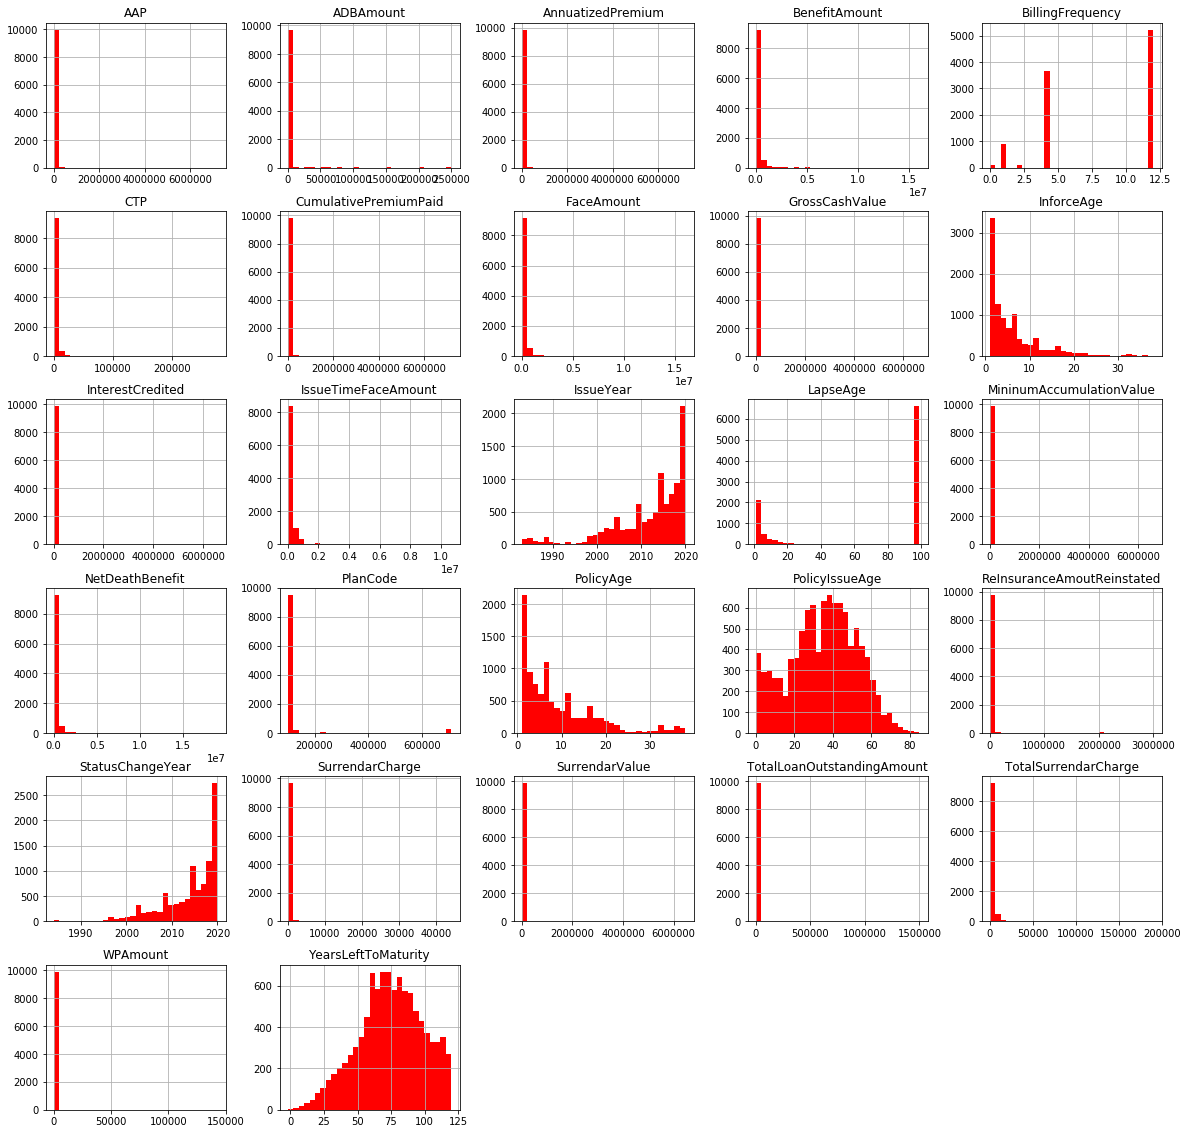

In [16]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

In [ ]:
# Filter the dataframe only with Policy Status A or L
filtered_df=df[(df.PolicyStatus == 'A') | (df.PolicyStatus =='L')]


In [ ]:
# checking any null value records and get a count
filtered_df.isnull().sum()
filtered_df.nunique()

In [ ]:
# changing policy status A to 1 and l to 2
changePolicyStatus = {"PolicyStatus":{"A": 1, "L": 2}}


In [ ]:
filtered_df = filtered_df.replace(changePolicyStatus)
filtered_df.head()
print(filtered_df.shape)

In [ ]:
missing_counts = filtered_df.isna().sum() # Since Policy Status changed A To 1 and l To 2, we get the missing percentage
missing_percent = missing_counts * 100 / len(filtered_df)
missing_value_df = pd.DataFrame({'count_missing': missing_counts, 'percent_missing': missing_percent})
missing_value_df

In [ ]:
# It will show correlation of only numerical variables here.
cor=filtered_df.corr()

In [ ]:
cor

In [ ]:
import missingno as msno
msno.heatmap(filtered_df)

In [ ]:
#Encoding will change all the categorical into numerical
df_coded = pd.get_dummies(filtered_df)

In [ ]:
filtered_df.PolicyStatus.value_counts()

In [ ]:
print(df_coded.shape)
df_coded.head()

In [ ]:
#changing particular empty/null into median 
#df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.median(), inplace = True)

In [ ]:
from scipy.stats import zscore
techSuppAttr=df_coded.iloc[:,3:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

In [ ]:
#checking heatmap against filtered_df
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
filtereddf_scaled=scaler.fit_transform(filtered_df)   
sns.heatmap(filtereddf_scaled_df.corr(),annot=True)
plt.show()

In [ ]:
#checking heatmap against df_coded
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
filtereddf_scaled=scaler.fit_transform(df_coded)   
sns.heatmap(filtereddf_scaled_df.corr(),annot=True)
plt.show()

In [ ]:
#we can use Box Plot to check how the mean changes for particular predictor if we interested
sns.boxplot(x="LapseAge", data=filtered_df)
sns.boxplot(x="LapseAge", data=df_coded) # if any categorical variable 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dfirst=filtered_df.iloc[:,[0,1,2]]
dfirst.head()
dlast=filtered_df.iloc[:,4:63]  
dlast.head()
excludeddata=pd.concat([dfirst, dlast.reindex(dfirst.index)], axis=1)
excludeddata.head()
X = excludeddata.iloc[:,0:62]  #independent-predictor columns 
y = filtered_df.iloc[:,4]    #target column i.e PolicyStatus
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 10 features with top 10 Fisher scores
selector = SelectKBest(f_classif, k = 10)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = filtered_df, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
import missingno as msno
msno.heatmap(df_coded)

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [ ]:
os_data_X, os_data_y = os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
os_data_y['y'].value_counts()

In [ ]:
print(f"Length of oversampled data {len(os_data_X)}")


In [ ]:
os_data_X.to_csv('train_data.csv',index=False,header=True)
os_data_y.to_csv('test_data.csv',index=False,header=True)
